## Amber Alert Greece - Παπαχρήστου Σοφία

https://www.hamogelo.gr/gr/el/eksafanismena-paidia:ambert-alert-hellas/

Όλα τα τρέχοντα περιστατικά εξαφάνισης του ελληνικού Amber Alert δεν βρίσκονται σε σελίδες το ένα κάτω από το άλλο. Βρίσκονται στο παραπάνω σύνδεσμο σε κινούμενο carousel το ένα δίπλα στο άλλο, με μόνη πληροφορία το url από ένα αναδυόμενο παράθυρο. Θα προσπαθήσω να πάρω το url για κάθε εξαφανισμένο παιδί και ανοίγοντας το θα παίρνω κάθε φορά από το κείμενο τις πληροφόρίες που θα φτιάξουν τις στήλες μου.

In [1]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np
import requests
import time

In [2]:
req = Request('https://www.hamogelo.gr/gr/el/eksafanismena-paidia:ambert-alert-hellas/', headers={'User-Agent': 'Mozilla/5.0'})
webpage = urlopen(req).read()
amber_alert = BeautifulSoup(webpage, "html.parser")

##1. Βρίσκω τα urls εξαφάνισης

In [3]:
#θα αποθηκεύσω όλα τα url που θα βρω σε λίστα
child_url= []

images_box = amber_alert.find('div', attrs={'id': 'missingchildren_carousel'})
for link in images_box.findAll("a"):
    #print(link.get('data-href'))
    child_url.append(link.get('data-href'))

In [4]:
child_url

['https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/255/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/254/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/248/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/250/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/246/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/247/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/244/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/243/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/226/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/197/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/188/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/199/',
 'https://www.hamogelo.gr/gr/el/ajax/missingchildren:details-modal/161/',
 'https://www.hamogelo.gr/gr/el/ajax/m

In [5]:
#βλέπω πόσες είναι οι δημοσιεύσεις για αγνοούμενα παιδιά
print(len(child_url))

55


##2. Κάνω scrape κάθε url
Από κάθε τέτοιο λινκ από την λίστα child_url, τώρα θα βρω και θα πάρω πληροφορίες για κάθε παιδι

In [6]:
child_info= []

for url in child_url:
  report_html = urlopen(url).read()
  report_doc = BeautifulSoup(report_html, "html.parser")
  info = report_doc.find('ul', class_= "clearfix")

  for link in info.findAll('span'):
    #print(link.text)
    child_info.append(link.text)

In [7]:
child_info

['Όνομα : ΜΑΡΙΑ-ΑΥΓΟΥΣΤΑ Σ.',
 'Ημερομηνία εξαφάνισης : 21 Ιανουαρίου 2022',
 'Ημερομηνία Γέννησης : 02 Οκτωβρίου 2008',
 'Χρώμα Ματιών : ΚΑΣΤΑΝΑ',
 'Χρώμα Μαλλιών : ΜΑΥΡΑ ΚΟΝΤΑ ',
 'Όνομα : ΜΠΙΜΠΙ ΑΜΙΝΑ ΣΑΧΑΜΠ ΖΑΝΤΑ',
 'Ημερομηνία εξαφάνισης : 13 Ιανουαρίου 2022',
 'Ημερομηνία Γέννησης : 28 Απριλίου 2006',
 'Χρώμα Ματιών : ΚΑΣΤΑΝΑ',
 'Χρώμα Μαλλιών : ΚΑΣΤΑΝΑ',
 'Όνομα : ΧΙΤΖΑΖΙ ΑΘΗΝΑ',
 'Ημερομηνία εξαφάνισης : 21 Νοεμβρίου 2021',
 'Ημερομηνία Γέννησης : 23 Φεβρουαρίου 2017',
 'Χρώμα Ματιών : ΚΑΣΤΑΝΑ',
 'Χρώμα Μαλλιών : ΜΑΥΡΑ ΜΑΚΡΙΑ',
 'Όνομα : ΑΛΕΞΑΝΔΡΟΣ Δ.',
 'Ημερομηνία εξαφάνισης : 19 Νοεμβρίου 2021',
 'Ημερομηνία Γέννησης : 15 Ιανουαρίου 2008',
 'Χρώμα Ματιών : ΚΑΣΤΑΝΑ',
 'Χρώμα Μαλλιών : ΚΑΣΤΑΝΑ',
 'Όνομα : ΜΙΧΑΗΛ Γ.',
 'Ημερομηνία εξαφάνισης : 17 Νοεμβρίου 2021',
 'Ημερομηνία Γέννησης : 08 Απριλίου 2006',
 'Χρώμα Ματιών : ΜΠΛΕ',
 'Χρώμα Μαλλιών : ΜΑΥΡΑ',
 'Όνομα : ΣΑΛΗ Σ.',
 'Ημερομηνία εξαφάνισης : 14 Νοεμβρίου 2021',
 'Ημερομηνία Γέννησης : 10 Μαρτίου 2007',
 'Χρώμα Ματιών : 

Λοιπόν βλέπω ότι η λίστα child_info είναι ενιαία. Για αυτό και θα την σπάσω ανα παιδί.

In [8]:
x = [i for i, s in enumerate(child_info) if s.startswith('Όνομα')]
y = x[1:] + [len(child_info)]
z = [child_info[i:j] for i, j in zip(x, y)]

z

[['Όνομα : ΜΑΡΙΑ-ΑΥΓΟΥΣΤΑ Σ.',
  'Ημερομηνία εξαφάνισης : 21 Ιανουαρίου 2022',
  'Ημερομηνία Γέννησης : 02 Οκτωβρίου 2008',
  'Χρώμα Ματιών : ΚΑΣΤΑΝΑ',
  'Χρώμα Μαλλιών : ΜΑΥΡΑ ΚΟΝΤΑ '],
 ['Όνομα : ΜΠΙΜΠΙ ΑΜΙΝΑ ΣΑΧΑΜΠ ΖΑΝΤΑ',
  'Ημερομηνία εξαφάνισης : 13 Ιανουαρίου 2022',
  'Ημερομηνία Γέννησης : 28 Απριλίου 2006',
  'Χρώμα Ματιών : ΚΑΣΤΑΝΑ',
  'Χρώμα Μαλλιών : ΚΑΣΤΑΝΑ'],
 ['Όνομα : ΧΙΤΖΑΖΙ ΑΘΗΝΑ',
  'Ημερομηνία εξαφάνισης : 21 Νοεμβρίου 2021',
  'Ημερομηνία Γέννησης : 23 Φεβρουαρίου 2017',
  'Χρώμα Ματιών : ΚΑΣΤΑΝΑ',
  'Χρώμα Μαλλιών : ΜΑΥΡΑ ΜΑΚΡΙΑ'],
 ['Όνομα : ΑΛΕΞΑΝΔΡΟΣ Δ.',
  'Ημερομηνία εξαφάνισης : 19 Νοεμβρίου 2021',
  'Ημερομηνία Γέννησης : 15 Ιανουαρίου 2008',
  'Χρώμα Ματιών : ΚΑΣΤΑΝΑ',
  'Χρώμα Μαλλιών : ΚΑΣΤΑΝΑ'],
 ['Όνομα : ΜΙΧΑΗΛ Γ.',
  'Ημερομηνία εξαφάνισης : 17 Νοεμβρίου 2021',
  'Ημερομηνία Γέννησης : 08 Απριλίου 2006',
  'Χρώμα Ματιών : ΜΠΛΕ',
  'Χρώμα Μαλλιών : ΜΑΥΡΑ'],
 ['Όνομα : ΣΑΛΗ Σ.',
  'Ημερομηνία εξαφάνισης : 14 Νοεμβρίου 2021',
  'Ημερομηνία Γέννησης : 10

In [9]:
#επιβεβαιώνω ότι είναι ίδιος ο αριθμός με τα url, άρα χωρίστηκαν σωστά
print(len(z))

55


Τώρα θέλω να τα μετατρέψω σε df αλλά πρέπει να βγάλω το "όνομα : ", "ημερομηνία εξαφάνισης : " κτλ. από κάθε εγγραφή- λίστα δεδομένων ανα παιδι.

In [10]:
import re

In [11]:
z = [[re.sub(r".*\s.*" + ': ' , r'', item) for item in sub_list] for sub_list in z]
z

[['ΜΑΡΙΑ-ΑΥΓΟΥΣΤΑ Σ.',
  '21 Ιανουαρίου 2022',
  '02 Οκτωβρίου 2008',
  'ΚΑΣΤΑΝΑ',
  'ΜΑΥΡΑ ΚΟΝΤΑ '],
 ['ΜΠΙΜΠΙ ΑΜΙΝΑ ΣΑΧΑΜΠ ΖΑΝΤΑ',
  '13 Ιανουαρίου 2022',
  '28 Απριλίου 2006',
  'ΚΑΣΤΑΝΑ',
  'ΚΑΣΤΑΝΑ'],
 ['ΧΙΤΖΑΖΙ ΑΘΗΝΑ',
  '21 Νοεμβρίου 2021',
  '23 Φεβρουαρίου 2017',
  'ΚΑΣΤΑΝΑ',
  'ΜΑΥΡΑ ΜΑΚΡΙΑ'],
 ['ΑΛΕΞΑΝΔΡΟΣ Δ.',
  '19 Νοεμβρίου 2021',
  '15 Ιανουαρίου 2008',
  'ΚΑΣΤΑΝΑ',
  'ΚΑΣΤΑΝΑ'],
 ['ΜΙΧΑΗΛ Γ.', '17 Νοεμβρίου 2021', '08 Απριλίου 2006', 'ΜΠΛΕ', 'ΜΑΥΡΑ'],
 ['ΣΑΛΗ Σ.', '14 Νοεμβρίου 2021', '10 Μαρτίου 2007', 'ΚΑΣΤΑΝΑ', 'ΚΟΚΚΙΝΑ'],
 ['ΣΤΑΜΑΤΙΝΑ Σ.',
  '15 Οκτωβρίου 2021',
  '01 Νοεμβρίου 2005',
  'ΚΑΣΤΑΝΑ',
  'ΚΑΣΤΑΝΑ'],
 ['ΣΑΧΑΜΠ ΖΑΝΤΑ ΜΠΙΜΠΙ ΑΜΙΝΑ',
  '25 Σεπτεμβρίου 2021',
  '28 Απριλίου 2006',
  'ΚΑΣΤΑΝΑ',
  'ΚΑΣΤΑΝΑ'],
 ['ΜΙΑ ΜΑΡΙΑΜ', '02 Μαίου 2021', '13 Αυγούστου 2006', 'ΚΑΣΤΑΝΑ', 'ΚΑΣΤΑΝΑ'],
 ['ΙΖΑΜΠΕΛΑ-ΕΛΕΝΑ (ον.) Σ.(επ.)',
  '15 Οκτωβρίου 2020',
  '30 June 2006',
  'ΜΑΥΡΑ',
  'ΜΑΥΡΑ'],
 ['ΡΑΦΑΗΛΙΑ Ε.',
  '24 Αυγούστου 2020',
  '13 Φεβρουαρίου 2006',
  'ΚΑΣΤΑΝΑ',
  '

##3. Μετατρέπω τα δεδομένα μου σε df

In [12]:
columns = ['Name','Date Missing','Birthdate','Eyes', 'Hair']
df = pd.DataFrame(z, columns=columns)
df.head(6)

,Name,Date Missing,Birthdate,Eyes,Hair
0,ΜΑΡΙΑ-ΑΥΓΟΥΣΤΑ Σ.,21 Ιανουαρίου 2022,02 Οκτωβρίου 2008,ΚΑΣΤΑΝΑ,ΜΑΥΡΑ ΚΟΝΤΑ
1,ΜΠΙΜΠΙ ΑΜΙΝΑ ΣΑΧΑΜΠ ΖΑΝΤΑ,13 Ιανουαρίου 2022,28 Απριλίου 2006,ΚΑΣΤΑΝΑ,ΚΑΣΤΑΝΑ
2,ΧΙΤΖΑΖΙ ΑΘΗΝΑ,21 Νοεμβρίου 2021,23 Φεβρουαρίου 2017,ΚΑΣΤΑΝΑ,ΜΑΥΡΑ ΜΑΚΡΙΑ
3,ΑΛΕΞΑΝΔΡΟΣ Δ.,19 Νοεμβρίου 2021,15 Ιανουαρίου 2008,ΚΑΣΤΑΝΑ,ΚΑΣΤΑΝΑ
4,ΜΙΧΑΗΛ Γ.,17 Νοεμβρίου 2021,08 Απριλίου 2006,ΜΠΛΕ,ΜΑΥΡΑ
5,ΣΑΛΗ Σ.,14 Νοεμβρίου 2021,10 Μαρτίου 2007,ΚΑΣΤΑΝΑ,ΚΟΚΚΙΝΑ


In [13]:
#προσθέτω στο df και μια στήλη με τα urls από την λίστα child_url που ειχα φτιάξει στην αρχή
df['Info Url'] = child_url
df.tail()

,Name,Date Missing,Birthdate,Eyes,Hair,Info Url
50,ΑΡΤΟΥΡ ΤΣΑΡΙΑ,09 Ιουλίου 2004,12 Αυγούστου 1995,Καφέ σκούρα,Καστανά,https://www.hamogelo.gr/gr/el/ajax/missingchil...
51,ΘΕΜΙΣΤΟΚΛΗΣ ΕΥΘΥΜΙΑΔΗΣ,30 June 2000,28 Οκτωβρίου 1984,Γαλάζια,Ξανθά,https://www.hamogelo.gr/gr/el/ajax/missingchil...
52,ΓΕΩΡΓΙΟΣ ΠΑΡΑΣΚΕΥΟΠΟΥΛΟΣ,24 June 1992,05 Μαρτίου 1982,Καστανά,Καστανόξανθα,https://www.hamogelo.gr/gr/el/ajax/missingchil...
53,BEN NEEDHAM,24 Ιουλίου 1991,29 Οκτωβρίου 1989,Γαλανά,Ξανθά,https://www.hamogelo.gr/gr/el/ajax/missingchil...
54,ΑΝΝΑ ΤΡΙΑΝΤΑΦΥΛΛΙΔΟΥ,19 Αυγούστου 1981,26 June 1979,Καστανά,Καστανά,https://www.hamogelo.gr/gr/el/ajax/missingchil...


##4. Επεξεργάζομαι το df

Πρωτού αποθηκεύσω το df σε csv, θα φτιάξω νέα στήλη που θα υπολογίζει ηλικία παιδιού όταν εξαφανίστηκε... Γι αυτό χρειάζεται να φτιάξω τις στήλες με τις ημερομηνίες

In [14]:
from datetime import datetime

In [15]:
#Φτιάχνω ένα λεξικό αγγλικών-ελληνικών μηνών για να μετατρέψω τους μήνες μου σε αριθμό.
d = {'Σεπτεμβρίου': '09', 'Οκτωβρίου': '10', 'Νοεμβρίου': '11', 'Δεκεμβρίου': '12', 'Ιανουαρίου': '01', 'Φεβρουαρίου': '02', 'Μαρτίου': '03', 'Απριλίου': '04', 'Μαίου': '05', 'Ιουνίου': '06', 'Ιουλίου': '07', 'Αυγούστου': '08', 'September': '09', 'Octomber': '10', 'November': '11', 'December': '12', 'January': '01', 'February': '02', 'March': '03', 'April': '04', 'May': '05', 'June': '06', 'July': '07', 'August': '08'}

df['Date Missing'] = df['Date Missing'].replace(d, regex=True)
df['Date Missing'] = pd.to_datetime(df['Date Missing'], format='%d %m %Y')

df['Birthdate'] = df['Birthdate'].replace(d, regex=True)
df['Birthdate'] = pd.to_datetime(df['Birthdate'], format='%d %m %Y', errors='coerce')

In [16]:
df

,Name,Date Missing,Birthdate,Eyes,Hair,Info Url
0,ΜΑΡΙΑ-ΑΥΓΟΥΣΤΑ Σ.,2022-01-21,2008-10-02,ΚΑΣΤΑΝΑ,ΜΑΥΡΑ ΚΟΝΤΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...
1,ΜΠΙΜΠΙ ΑΜΙΝΑ ΣΑΧΑΜΠ ΖΑΝΤΑ,2022-01-13,2006-04-28,ΚΑΣΤΑΝΑ,ΚΑΣΤΑΝΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...
2,ΧΙΤΖΑΖΙ ΑΘΗΝΑ,2021-11-21,2017-02-23,ΚΑΣΤΑΝΑ,ΜΑΥΡΑ ΜΑΚΡΙΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...
3,ΑΛΕΞΑΝΔΡΟΣ Δ.,2021-11-19,2008-01-15,ΚΑΣΤΑΝΑ,ΚΑΣΤΑΝΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...
4,ΜΙΧΑΗΛ Γ.,2021-11-17,2006-04-08,ΜΠΛΕ,ΜΑΥΡΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...
5,ΣΑΛΗ Σ.,2021-11-14,2007-03-10,ΚΑΣΤΑΝΑ,ΚΟΚΚΙΝΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...
6,ΣΤΑΜΑΤΙΝΑ Σ.,2021-10-15,2005-11-01,ΚΑΣΤΑΝΑ,ΚΑΣΤΑΝΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...
7,ΣΑΧΑΜΠ ΖΑΝΤΑ ΜΠΙΜΠΙ ΑΜΙΝΑ,2021-09-25,2006-04-28,ΚΑΣΤΑΝΑ,ΚΑΣΤΑΝΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...
8,ΜΙΑ ΜΑΡΙΑΜ,2021-05-02,2006-08-13,ΚΑΣΤΑΝΑ,ΚΑΣΤΑΝΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...
9,ΙΖΑΜΠΕΛΑ-ΕΛΕΝΑ (ον.) Σ.(επ.),2020-10-15,2006-06-30,ΜΑΥΡΑ,ΜΑΥΡΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...


In [17]:
df.dtypes

Name                    object
Date Missing    datetime64[ns]
Birthdate       datetime64[ns]
Eyes                    object
Hair                    object
Info Url                object
dtype: object

In [18]:
#astype('<m8[Y]') βαζω αυτό γιατι διαφορετικά υπολογίζει ημέρες και εγω θέλω χρόνια στην ηλικία
df['Age']= (df['Date Missing']- df['Birthdate']).astype('<m8[Y]')
df.head()

,Name,Date Missing,Birthdate,Eyes,Hair,Info Url,Age
0,ΜΑΡΙΑ-ΑΥΓΟΥΣΤΑ Σ.,2022-01-21,2008-10-02,ΚΑΣΤΑΝΑ,ΜΑΥΡΑ ΚΟΝΤΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...,13.0
1,ΜΠΙΜΠΙ ΑΜΙΝΑ ΣΑΧΑΜΠ ΖΑΝΤΑ,2022-01-13,2006-04-28,ΚΑΣΤΑΝΑ,ΚΑΣΤΑΝΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...,15.0
2,ΧΙΤΖΑΖΙ ΑΘΗΝΑ,2021-11-21,2017-02-23,ΚΑΣΤΑΝΑ,ΜΑΥΡΑ ΜΑΚΡΙΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...,4.0
3,ΑΛΕΞΑΝΔΡΟΣ Δ.,2021-11-19,2008-01-15,ΚΑΣΤΑΝΑ,ΚΑΣΤΑΝΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...,13.0
4,ΜΙΧΑΗΛ Γ.,2021-11-17,2006-04-08,ΜΠΛΕ,ΜΑΥΡΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...,15.0


Αποθηκεύω το df μου σε csv.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/amber_alert.csv", sep='t', encoding='utf-8', index=False)

https://raw.githubusercontent.com/SophiaPapach/datajour/main/amber_alert.csv

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/amber_alert.csv", sep='t')

In [3]:
#df= pd.read_csv("https://raw.githubusercontent.com/SophiaPapach/datajour/main/amber_alert.csv", sep='t')

In [4]:
df.head()

,Name,Date Missing,Birthdate,Eyes,Hair,Info Url,Age
0,ΜΑΡΙΑ-ΑΥΓΟΥΣΤΑ Σ.,2022-01-21,2008-10-02,ΚΑΣΤΑΝΑ,ΜΑΥΡΑ ΚΟΝΤΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...,13.0
1,ΜΠΙΜΠΙ ΑΜΙΝΑ ΣΑΧΑΜΠ ΖΑΝΤΑ,2022-01-13,2006-04-28,ΚΑΣΤΑΝΑ,ΚΑΣΤΑΝΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...,15.0
2,ΧΙΤΖΑΖΙ ΑΘΗΝΑ,2021-11-21,2017-02-23,ΚΑΣΤΑΝΑ,ΜΑΥΡΑ ΜΑΚΡΙΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...,4.0
3,ΑΛΕΞΑΝΔΡΟΣ Δ.,2021-11-19,2008-01-15,ΚΑΣΤΑΝΑ,ΚΑΣΤΑΝΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...,13.0
4,ΜΙΧΑΗΛ Γ.,2021-11-17,2006-04-08,ΜΠΛΕ,ΜΑΥΡΑ,https://www.hamogelo.gr/gr/el/ajax/missingchil...,15.0


In [5]:
df.dtypes

Name             object
Date Missing     object
Birthdate        object
Eyes             object
Hair             object
Info Url         object
Age             float64
dtype: object

In [6]:
df['Age']= df['Age'].astype(np.int64)

* Ποιος είναι ο μέσος όρος ηλικίας των παιδιών που είναι εξαφανισμένα αυτή την στιγμή;

In [7]:
df['Age'].mean()

10.327272727272728

In [9]:
import seaborn as sns
sns.set_theme(palette="pastel")

In [10]:
df['Age'].value_counts().head()

15    7
14    6
13    5
4     5
6     4
Name: Age, dtype: int64

Text(0.5, 0, 'Source Of Data: Amber-Alert Hellas')

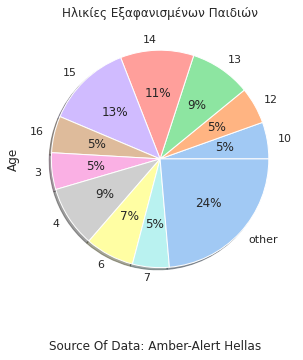

In [11]:
#εκει που εχω βάλει 3, βάζεις οποιο αριθμο απο value counts θες να μπει στα others
s=df['Age'].value_counts()
s.groupby(np.where(s>=3,s.index,'other')).sum().plot(kind='pie', shadow = True, figsize=(5,5), autopct='%1.0f%%', title='Ηλικίες Εξαφανισμένων Παιδιών')
plt.suptitle('Source Of Data: Amber-Alert Hellas',fontsize=12, y=0)

* Ποια χρονιά έχει τις περισσότερες ενεργές εξαφανίσεις παιδιών;



In [12]:
pd.DatetimeIndex(df['Date Missing']).year.value_counts()

2015    12
2019     8
2021     7
2011     5
2020     3
2016     3
2008     3
2022     2
2018     2
2007     2
2004     2
1992     1
1991     1
2009     1
2000     1
2005     1
1981     1
Name: Date Missing, dtype: int64

In [40]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params, palette="pastel")
#sns.set_theme(style="whitegrid", rc=custom_params)

Text(0.5, 0, 'Source Of Data: Amber Alert Hellas')

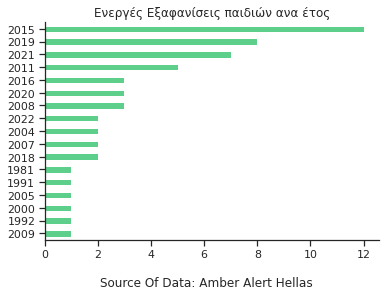

In [41]:
pd.DatetimeIndex(df['Date Missing']).year.value_counts(ascending=True).plot(kind='barh', title='Ενεργές Εξαφανίσεις παιδιών ανα έτος', color= np.random.rand(3))
plt.suptitle('Source Of Data: Amber Alert Hellas',fontsize=12, y=0)

* Ποια εποχή / μήνα έχουμε τις περισσότερες εξαφανίσεις;

In [42]:
pd.DatetimeIndex(df['Date Missing']).month.value_counts()

9     8
11    7
10    7
1     5
12    5
7     5
5     4
8     4
6     4
4     4
2     2
Name: Date Missing, dtype: int64

Text(0.5, 0, 'Source Of Data: Amber Alert Hellas')

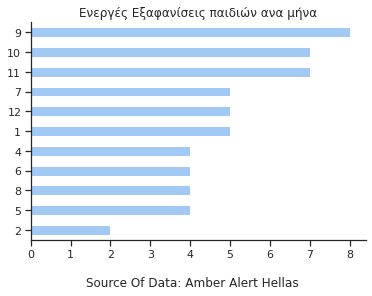

In [43]:
pd.DatetimeIndex(df['Date Missing']).month.value_counts(ascending=True).plot(kind='barh', title='Ενεργές Εξαφανίσεις παιδιών ανα μήνα')
plt.suptitle('Source Of Data: Amber Alert Hellas',fontsize=12, y=0)

* Ποιο είναι η μικρότερη ηλικία εξαφανισμένου παιδιού και ποια η μεγαλύτερη;

In [46]:
#df['Age'].max() κάνω το απο κάτω για να δω και τα στοιχεία του παιδιού όχι μόνο τον αριθμό της ηλικίας
df[df['Age']== df['Age'].max()]

,Name,Date Missing,Birthdate,Eyes,Hair,Info Url,Age
38,LEONG JIN KUOK,2011-09-27,1983-08-22,Μαύρα,Μαύρα,https://www.hamogelo.gr/gr/el/ajax/missingchil...,28


In [47]:
df[df['Age']== df['Age'].min()]

,Name,Date Missing,Birthdate,Eyes,Hair,Info Url,Age
43,MATEO DULLIA,2008-09-07,2007-09-28,Γκριζοπράσινα,Καστανά ανοιχτά,https://www.hamogelo.gr/gr/el/ajax/missingchil...,0
